<a href="https://colab.research.google.com/github/whsu00/project/blob/master/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

In [2]:
def get_file(file_path):
  log_file = pd.read_csv(file_path, sep= '\t')
  #Backfill blank values (Discriminator Only Updates Every 2 Epochs)
  log_file['LogProbabilityContext'] = log_file['LogProbabilityContext'].replace(to_replace = 0, method='bfill')
  log_file['DecoderAccuracy'] = log_file['DecoderAccuracy'].replace(to_replace = 0, method='bfill')
  log_file['LossDC'] = log_file['LossDC'].replace(to_replace = 0, method='bfill')
  log_file['DeltaLossDC'] = log_file['DeltaLossDC'].replace(to_replace = 0, method='bfill')
  return log_file

In [3]:
def create_line_graph(df, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  if type(plotCol) != list:
    sns.lineplot(x = df['Epoch'], y = df[plotCol], label = legendTxt)
  else:
    for i in range(len(plotCol)):
      sns.lineplot(x = df['Epoch'], y = df[plotCol[i]], label = legendTxt[i])
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


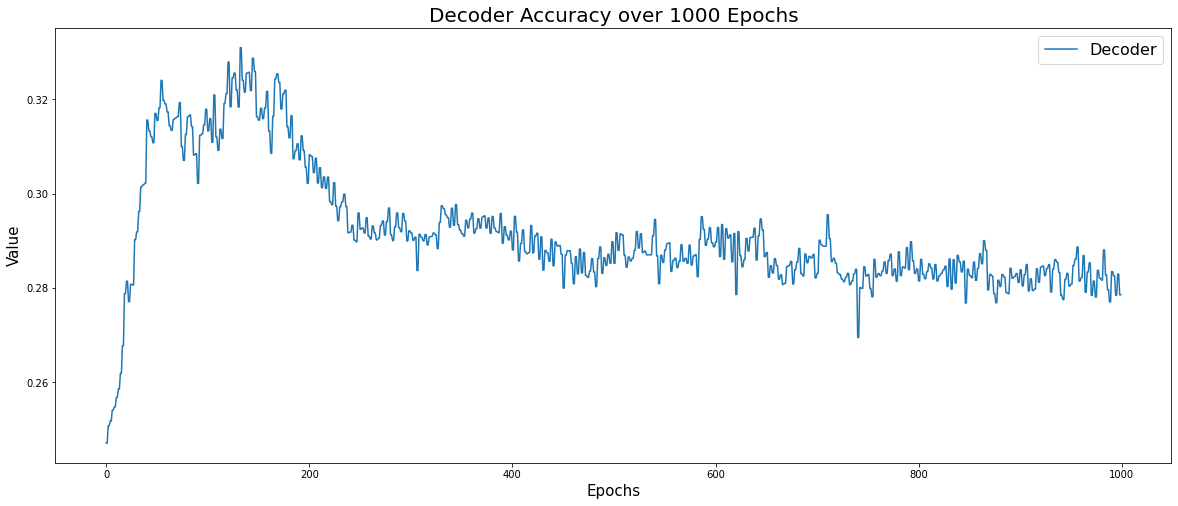

In [4]:
# log_file = get_file('/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt')
log_file = get_file('https://pastebin.com/raw/bsr7HCkE')
create_line_graph(df = log_file, plotCol= 'DecoderAccuracy', x_label = 'Epochs', y_label = 'Value', title = 'Decoder Accuracy over 1000 Epochs', legendTxt='Decoder')

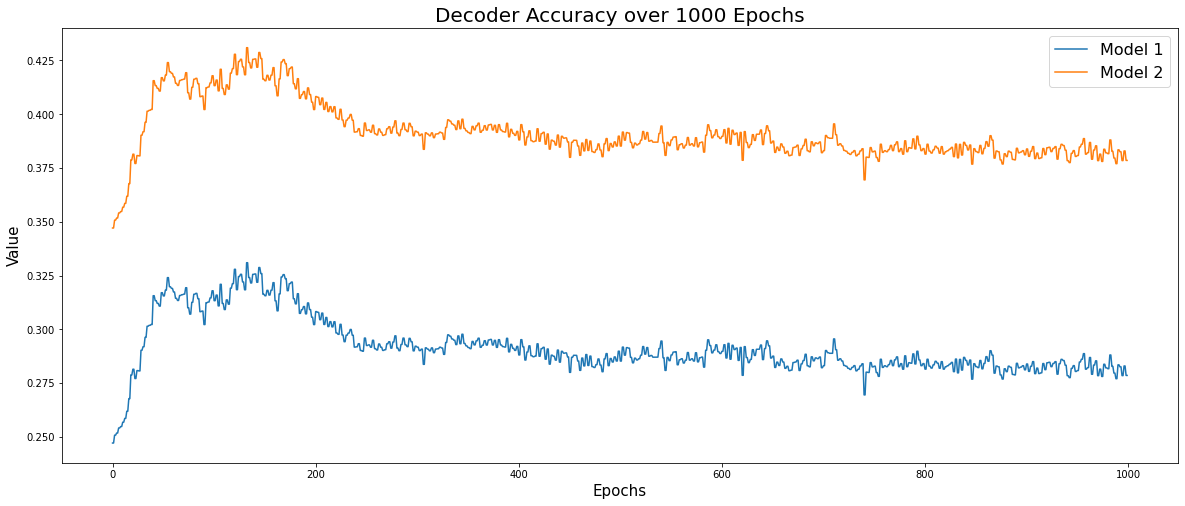

In [5]:
df = pd.DataFrame({"Epoch":range(1000), "model1":log_file["DecoderAccuracy"], "model2":log_file["DecoderAccuracy"]+0.1})
create_line_graph(df = df, plotCol= ['model1', 'model2'], x_label = 'Epochs', y_label = 'Value', title = 'Decoder Accuracy over 1000 Epochs', legendTxt=['Model 1', 'Model 2'])